In [1]:
import numpy as np

In [2]:
detector_array = np.zeros((500, 500))
print(detector_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
pixel_edge_length = 15 #microns
pixel_half_length = (pixel_edge_length / 2)
num_of_pixels = 500
num_of_pixel_x = 500
num_of_pixel_y = 500
electrons_per_photon = 1500 #electrons

In [4]:
def bottom_left_of_pixel():
    pixel_corner_i = i * pixel_edge_length
    pixel_corner_j = j * pixel_edge_length

In [5]:
#i = the row value of pixel
#j = the column value of pixel
#horz_d= horizontal distance from bottom left
#vert_d= vertical distance from bottom left
def center_of_pixel(pixel_edge_length, i, j):
    horz_d = (i * pixel_edge_length) + pixel_half_length
    vert_d = (j * pixel_edge_length) + pixel_half_length
    #print("pixel: [" + str(i) + ", " + str(j) + "], center of pixel: [" + str(horz_d) + ", " + str(vert_d) + "] microns.")
for i in range(len(detector_array)):
    for j in range(len(detector_array)):
        center_of_pixel(pixel_edge_length, i, j)   

In [6]:
import random
#the random.random() makes a random number between 0 & 1, so we multiply it to get the range we want
photon_sphere_x = random.random() * pixel_edge_length * num_of_pixel_x #microns
photon_sphere_y = random.random() * pixel_edge_length * num_of_pixel_y #microns
photon_sphere_z = 15 #microns
print("photon hit at [x,y] = [" + str(photon_sphere_x) + ", " + str(photon_sphere_y) + "] microns")

photon hit at [x,y] = [3894.637176637744, 3399.2783670541658] microns


In [7]:
#photon_sphere_x and photon_sphere_y is the center point of the sphere
diameter_electron_cloud = 10 #microns
radius_electron_cloud = diameter_electron_cloud / 2 #microns

In [8]:
detector_array_x = np.arange(num_of_pixel_x) * pixel_edge_length + pixel_half_length
detector_array_y = np.arange(num_of_pixel_y) * pixel_edge_length + pixel_half_length
#remember multiple pixels have the same center value, but this array contains all of those possibilities

In [9]:
#redefining variables as arrays to be more precise
photon_sphere_microns = [photon_sphere_x, photon_sphere_y, photon_sphere_z]
photon_sphere_pixel = [photon_sphere_x / pixel_edge_length, photon_sphere_y / pixel_edge_length]
print("sphere position  in microns " + str(photon_sphere_microns))
print("sphere position in pixel " + str(photon_sphere_pixel))


sphere position  in microns [3894.637176637744, 3399.2783670541658, 15]
sphere position in pixel [259.6424784425163, 226.61855780361105]


In [10]:
closest_pixel_x = (np.where(np.abs(detector_array_x - photon_sphere_x) == np.min(np.abs(detector_array_x - photon_sphere_x))))[0]
closest_pixel_x_microns = closest_pixel_x [0] * pixel_edge_length + pixel_half_length
closest_pixel_y = (np.where(np.abs(detector_array_y - photon_sphere_y) == np.min(np.abs(detector_array_y - photon_sphere_y))))[0]
closest_pixel_y_microns = closest_pixel_y [0] * pixel_edge_length + pixel_half_length
closest_pixel_arr = [closest_pixel_x[0], closest_pixel_y[0]]
closest_pixel_microns = [closest_pixel_x_microns, closest_pixel_y_microns]
print("closest pixel to sphere: " + str(closest_pixel_arr))
print("closest pixel's center in microns: " + str(closest_pixel_microns))

closest pixel to sphere: [259, 226]
closest pixel's center in microns: [3892.5, 3397.5]


In [11]:
#measure the distance from closest_pixel_microns to photon_sphere_microns in x and y directions
#all variables here are measured in microns
dist_sphere_pixel_x = np.abs(closest_pixel_x_microns - photon_sphere_x)
dist_sphere_pixel_y = np.abs(closest_pixel_y_microns - photon_sphere_y)
total_dist_sphere_pixel = np.sqrt((dist_sphere_pixel_x ** 2) + (dist_sphere_pixel_y ** 2))
print("distnace in x: " + str(dist_sphere_pixel_x) + " microns, " + "distance in y: " + str(dist_sphere_pixel_y) + " microns")
print("total distance from center of sphere to center of pixel: " + str(total_dist_sphere_pixel) + " microns")

distnace in x: 2.137176637743778 microns, distance in y: 1.7783670541657557 microns
total distance from center of sphere to center of pixel: 2.780308141242619 microns


In [ ]:

#sm_pixel_edge_length = .5 #microns
#sm_pixel_half_length = sm_pixel_edge_length/2 #microns
#graph_num_of_pixels_x = 3
#sm_num_of_pixels = pixel_edge_length * (1 / sm_pixel_edge_length) * graph_num_of_pixels_x
#sm_num_of_pixels = 45 when sm_pixel_edge_length = 1 micron
#sm_third_pixels = sm_num_of_pixels / 3
#sm_two_thirds_pixels = sm_num_of_pixels * (2/3)
#sm_array = np.zeros ((sm_num_of_pixels, sm_num_of_pixels, sm_num_of_pixels))
#sm_x_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_x[closest_pixel_x - 1] - pixel_half_length) + sm_pixel_edge_length
#sm_y_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_y[closest_pixel_y - 1] - pixel_half_length) + sm_pixel_edge_length

In [18]:
sm_pixel_edge_length = .5 #microns
sm_pixel_half_length = sm_pixel_edge_length/2 #microns
sm_num_of_pixels = 90
sm_third_pixels = sm_num_of_pixels / 3
sm_two_thirds_pixels = sm_num_of_pixels * (2/3)
sm_array = np.zeros ((sm_num_of_pixels, sm_num_of_pixels, sm_num_of_pixels))
sm_x_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_x[closest_pixel_x - 1] - pixel_half_length) + sm_pixel_edge_length
sm_y_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length + (detector_array_y[closest_pixel_y -1] - pixel_half_length) + sm_pixel_edge_length   

In [19]:
sm_x_cen

array([3870.5, 3871. , 3871.5, 3872. , 3872.5, 3873. , 3873.5, 3874. ,
       3874.5, 3875. , 3875.5, 3876. , 3876.5, 3877. , 3877.5, 3878. ,
       3878.5, 3879. , 3879.5, 3880. , 3880.5, 3881. , 3881.5, 3882. ,
       3882.5, 3883. , 3883.5, 3884. , 3884.5, 3885. , 3885.5, 3886. ,
       3886.5, 3887. , 3887.5, 3888. , 3888.5, 3889. , 3889.5, 3890. ,
       3890.5, 3891. , 3891.5, 3892. , 3892.5, 3893. , 3893.5, 3894. ,
       3894.5, 3895. , 3895.5, 3896. , 3896.5, 3897. , 3897.5, 3898. ,
       3898.5, 3899. , 3899.5, 3900. , 3900.5, 3901. , 3901.5, 3902. ,
       3902.5, 3903. , 3903.5, 3904. , 3904.5, 3905. , 3905.5, 3906. ,
       3906.5, 3907. , 3907.5, 3908. , 3908.5, 3909. , 3909.5, 3910. ,
       3910.5, 3911. , 3911.5, 3912. , 3912.5, 3913. , 3913.5, 3914. ,
       3914.5, 3915. ])

In [20]:
detector_array_x[closest_pixel_x]

array([3892.5])

In [21]:
sm_y_cen

array([3375.5, 3376. , 3376.5, 3377. , 3377.5, 3378. , 3378.5, 3379. ,
       3379.5, 3380. , 3380.5, 3381. , 3381.5, 3382. , 3382.5, 3383. ,
       3383.5, 3384. , 3384.5, 3385. , 3385.5, 3386. , 3386.5, 3387. ,
       3387.5, 3388. , 3388.5, 3389. , 3389.5, 3390. , 3390.5, 3391. ,
       3391.5, 3392. , 3392.5, 3393. , 3393.5, 3394. , 3394.5, 3395. ,
       3395.5, 3396. , 3396.5, 3397. , 3397.5, 3398. , 3398.5, 3399. ,
       3399.5, 3400. , 3400.5, 3401. , 3401.5, 3402. , 3402.5, 3403. ,
       3403.5, 3404. , 3404.5, 3405. , 3405.5, 3406. , 3406.5, 3407. ,
       3407.5, 3408. , 3408.5, 3409. , 3409.5, 3410. , 3410.5, 3411. ,
       3411.5, 3412. , 3412.5, 3413. , 3413.5, 3414. , 3414.5, 3415. ,
       3415.5, 3416. , 3416.5, 3417. , 3417.5, 3418. , 3418.5, 3419. ,
       3419.5, 3420. ])

In [22]:
sm_z_cen = np.arange(sm_num_of_pixels) * sm_pixel_edge_length

In [23]:
for i in range(sm_num_of_pixels):
    for j in range(sm_num_of_pixels):
        for k in range(sm_num_of_pixels):
            distance_to_center_of_photon = np.sqrt((sm_x_cen[i]-photon_sphere_x)**2 + \
                                                (sm_y_cen[j]-photon_sphere_y)**2 + \
                                                (sm_z_cen[k]-photon_sphere_z)**2)
            if distance_to_center_of_photon < diameter_electron_cloud/2:
                sm_array[i,j,k] = 1.

In [24]:
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

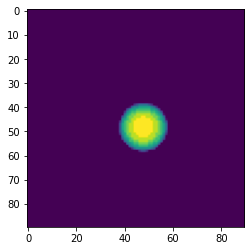

In [26]:
img = np.sum(sm_array,axis=2)
imgplot = plt.imshow(img)

In [27]:
np.sum(img)

4190.0

In [28]:
percent_pixel_1 = np.sum(img[0:int(sm_third_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_2 = np.sum(img[0:int(sm_third_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_3 = np.sum(img[0:int(sm_third_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)
percent_pixel_4 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_5 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_6 = np.sum(img[int(sm_third_pixels):int(sm_two_thirds_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)
percent_pixel_7 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), 0:int(sm_third_pixels)]) / np.sum(img)
percent_pixel_8 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), int(sm_third_pixels):int(sm_two_thirds_pixels)]) / np.sum(img)
percent_pixel_9 = np.sum(img[int(sm_two_thirds_pixels):int(sm_num_of_pixels), int(sm_two_thirds_pixels):int(sm_num_of_pixels)]) / np.sum(img)

In [29]:
print("% in first pixel: " + str(percent_pixel_1 * 100) + "%")
print("% in second pixel: " + str(percent_pixel_2 * 100) + "%")
print("% in third pixel: " + str(percent_pixel_3 * 100) + "%")
print("% in fourth pixel: " + str(percent_pixel_4 * 100) + "%")
print("% in fifth pixel: " + str(percent_pixel_5 * 100) + "%")
print("% in sixth pixel: " + str(percent_pixel_6 * 100) + "%")
print("% in seventh pixel: " + str(percent_pixel_7 * 100) + "%")
print("% in eigth pixel: " + str(percent_pixel_8 * 100) + "%")
print("% in ninth pixel: " + str(percent_pixel_9 * 100) + "%")

% in first pixel: 0.0%
% in second pixel: 0.0%
% in third pixel: 0.0%
% in fourth pixel: 0.0%
% in fifth pixel: 100.0%
% in sixth pixel: 0.0%
% in seventh pixel: 0.0%
% in eigth pixel: 0.0%
% in ninth pixel: 0.0%


In [30]:
detector_array[closest_pixel_x,closest_pixel_y] += percent_pixel_1 * electrons_per_photon

In [31]:
electrons_pixel_1 = round(electrons_per_photon * percent_pixel_1)
electrons_pixel_2 = round(electrons_per_photon * percent_pixel_2)
electrons_pixel_3 = round(electrons_per_photon * percent_pixel_3)
electrons_pixel_4 = round(electrons_per_photon * percent_pixel_4)
electrons_pixel_5 = round(electrons_per_photon * percent_pixel_5)
electrons_pixel_6 = round(electrons_per_photon * percent_pixel_6)
electrons_pixel_7 = round(electrons_per_photon * percent_pixel_7)
electrons_pixel_8 = round(electrons_per_photon * percent_pixel_8)
electrons_pixel_9 = round(electrons_per_photon * percent_pixel_9)

In [32]:
print('1. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y - 1]))
print('2. ' + str(detector_array[closest_pixel_x, closest_pixel_y - 1]))
print('3. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y - 1]))
print('4. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y]))
print('5. ' + str(detector_array[closest_pixel_x, closest_pixel_y]))
print('6. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y]))
print('7. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y + 1]))
print('8. ' + str(detector_array[closest_pixel_x, closest_pixel_y + 1]))
print('9. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y + 1]))

1. [0.]
2. [0.]
3. [0.]
4. [0.]
5. [0.]
6. [0.]
7. [0.]
8. [0.]
9. [0.]


In [33]:
detector_array[closest_pixel_x - 1, closest_pixel_y - 1] += electrons_pixel_1
detector_array[closest_pixel_x, closest_pixel_y - 1] += electrons_pixel_2
detector_array[closest_pixel_x + 1, closest_pixel_y - 1] += electrons_pixel_3
detector_array[closest_pixel_x - 1, closest_pixel_y] += electrons_pixel_4
detector_array[closest_pixel_x, closest_pixel_y] += electrons_pixel_5
detector_array[closest_pixel_x + 1, closest_pixel_y] += electrons_pixel_6
detector_array[closest_pixel_x - 1, closest_pixel_y + 1] += electrons_pixel_7
detector_array[closest_pixel_x, closest_pixel_y + 1] += electrons_pixel_8
detector_array[closest_pixel_x + 1, closest_pixel_y + 1] += electrons_pixel_9

In [34]:
print('1. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y - 1]))
print('2. ' + str(detector_array[closest_pixel_x, closest_pixel_y - 1]))
print('3. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y - 1]))
print('4. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y]))
print('5. ' + str(detector_array[closest_pixel_x, closest_pixel_y]))
print('6. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y]))
print('7. ' + str(detector_array[closest_pixel_x - 1, closest_pixel_y + 1]))
print('8. ' + str(detector_array[closest_pixel_x, closest_pixel_y + 1]))
print('9. ' + str(detector_array[closest_pixel_x + 1, closest_pixel_y + 1]))

1. [0.]
2. [0.]
3. [0.]
4. [0.]
5. [1500.]
6. [0.]
7. [0.]
8. [0.]
9. [0.]


In [35]:
check_tot_electrons = np.sum(detector_array)
if (check_tot_electrons == electrons_per_photon):
    print('No rounding error. total number of electrons = ' + str(electrons_per_photon))
else:
    print('rounding error: total number of electrons is not =' + str(electrons_per_photon))

No rounding error. total number of electrons = 1500
